In [1]:
import numpy as np
import qutip as qt
import cmath

In [2]:
# Swap function
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list
 
# Driver function
#List = [23, 65, 19, 90]
pos1, pos2  = 2, 4
List = [0,1,2,3,4]
#print(swapPositions(List, pos1-1, pos2-1))

### BS Function

In [3]:
def BS(J, N, state, number_modes, mode1, mode2):
    #N = 2  # number of levels in qubit state
    #E = 1   # number of photons in the mode
    alpha = 1 # eigenvalue of coherent state
    t = 10  # evolution time
    steps = 1000 #time steps
    #J = 0.07853957008534297  # strength of the COUPLİNG for 50/50
    #kappa = 0  # strength of the Cross-Kerr interaction
    
    
    a = qt.qeye(N)
    b = qt.tensor(qt.destroy(N), qt.qeye(N))
    c = qt.tensor(qt.qeye(N), qt.destroy(N))
    
    H_TDC = J * (b.dag()*c + c.dag()*b)   # TDC, on one mode a new photon is created, on the other one is destroyed.
    tlist = np.linspace(0, t, steps)
    BS_all = qt.propagator(H_TDC, tlist, [], {}) 
    BS = BS_all[-1]
    
    #Creating a list [0,1,2,3,4] for the modes
    initial_permute_list = list(range(number_modes))  #[0,1,2,...]
    
    #Swapping the modes
    
    pos1, pos2  = 1,mode1+1
    
    #swapPositions is already defined above. 
    permuted_list = swapPositions(initial_permute_list, pos1-1, pos2-1)

    pos3, pos4 = 2,mode2+1
    permuted_list2 = swapPositions(permuted_list, pos3-1, pos4-1)

    
    state_perm = state.permute(permuted_list2)
    
    operator_list = [BS] + [a] * (number_modes - 2)

    q1 = qt.tensor(operator_list) * state_perm
    
    q2 = q1.permute(permuted_list)
    
    
    results = []
    results.append(q2)
    for i in range(number_modes):
        pt = q2.ptrace(i)
        
        results.append(np.trace(pt * qt.create(N) * qt.destroy(N)))
        
        
    return results

### PS

In [4]:
def PS(N, phi, state, number_modes, mode1):
    #N = 10  # number of levels in qubit state
    t = 10  # evolution time
    steps = 1000 #time steps
    
    a = qt.qeye(N)
    
    
    #phi = 0.1570909090909091
    x = [np.exp(1j*n*phi) for n in range(N)]
    PS = qt.Qobj(np.diag(x))
    
    #Creating a list [0,1,2,3,4] for the modes
    initial_permute_list = list(range(number_modes))  #[0,1,2,...]
    
    #Swapping the modes
    
    pos1, pos2  = 1,mode1+1
    
    #swapPositions is already defined above. 
    permuted_list = swapPositions(initial_permute_list, pos1-1, pos2-1)
    
    state_perm = state.permute(permuted_list)
    
    operator_list = [PS] + [a] * (number_modes - 1)

    q1 = qt.tensor(operator_list) * state_perm
    
    q2 = q1.permute(permuted_list)
    
    
    results = []
    results.append(q2)
    for i in range(number_modes):
        pt = q2.ptrace(i)
        results.append(np.trace(pt * qt.create(N) * qt.destroy(N)))
        
        
    return results

### CKH

In [5]:
def CKH2(N, kappa, state, number_modes, mode1, mode2,*args): #args := the modes we want to put into the partial trace
    #N = 10
    #alpha = 1
    t = 10  # evolution time
    steps = 1000 #time steps
    #J = 0.07853957008534297  # strength of the COUPLİNG for 50/50
    #kappa = 0  # strength of the Cross-Kerr interaction

    a = qt.qeye(N)
    a_V = qt.tensor(qt.destroy(N), qt.qeye(N))
    c = qt.tensor(qt.qeye(N), qt.destroy(N))
    
    H_int = kappa * a_V.dag() * a_V  * c.dag() * c
    
    tlist = np.linspace(0, t, steps)
    U_all = qt.propagator(H_int, tlist, [], {}) 
    U = U_all[-1]

    #Creating a list [0,1,2,3,4] for the modes
    initial_permute_list = list(range(number_modes))
    
    #Swapping the modes
    
    pos1, pos2  = 1, mode1+1
    
    #swapPositions is already defined above. 
    permuted_list = swapPositions(initial_permute_list, pos1-1, pos2-1)

    pos3, pos4 = 2,mode2+1
    permuted_list2 = swapPositions(permuted_list, pos3-1, pos4-1)
    state_perm = state.permute(permuted_list2)
    
    operator_list = [U] + [a] * (number_modes - 2)

    q1 = qt.tensor(operator_list) * state_perm
    
    q2 = q1.permute(permuted_list)
    
    
    results0 = []
    results0.append(q2)
    
    pt_mode_list = [] 
    for i in args:
        pt_mode_list.append(i)
        
    pt = q2.ptrace(pt_mode_list)
    results0.append(pt)
    alpha = (pt[1][0][N])   #|0E> 

    phi = np.angle(alpha)
     

    results0.append(phi)    
    
        
        
    return results0

## Identity

In [6]:
def identity(N, state, number_modes, mode1):
    
    a = qt.qeye(N)
    

    #Creating a list [0,1,2,3,4] for the modes
    initial_permute_list = list(range(number_modes))  #[0,1,2,...]
    
    #Swapping the modes
    
    pos1, pos2  = 1,mode1+1
    
    #swapPositions is already defined above. 
    permuted_list = swapPositions(initial_permute_list, pos1-1, pos2-1)
    
    state_perm = state.permute(permuted_list)
    
    operator_list = [a] + [a] * (number_modes - 1)

    q1 = qt.tensor(operator_list) * state_perm
    
    q2 = q1.permute(permuted_list)
    
    
    results = []
    results.append(q2)
    for i in range(number_modes):
        pt = q2.ptrace(i)
        results.append(np.trace(pt * qt.create(N) * qt.destroy(N)))
        
        
    return results

### Measurement Function

In [7]:
def meas(N,state,mode1,mode2):
    results = []
    #a = qt.qeye(N)
    pt = state.ptrace(mode1)
    pt2 = state.ptrace(mode2)
    qwe = np.trace(pt * qt.create(N) * qt.destroy(N)) + np.trace(pt2 * qt.create(N) * qt.destroy(N))
    results.append(qwe)
    
    return results



### Defining a Sigma_Z function

In [8]:
def sigmaz_meas(prob_mode1,prob_mode2,input_state,nm_total,ckh_mode1,ckh_mode2,select): #input state = qt.tensor(initial,probe)
    state1 = BS(0.07853957008534297,N,input_state,nm_total,prob_mode1,prob_mode2)[0]
    state2 = CKH2(N, kappa:=1*0.3139464882943144, state1, number_modes:=nm_total,ckh_mode1,ckh_mode2,prob_mode1,prob_mode2)[0]

    if select == 0:
        return BS(0.07853957008534297,N,state2,number_modes,prob_mode1,probe_mode2)[0]
    else:
        return BS(0.07853957008534297,N,state2,number_modes,prob_mode1,probe_mode2)[1:number_modes+1]

### It worked!

In [9]:
alpha_values = []
beta_values = []
for c in np.linspace(0, 1, 20):
    #c = 1
    A = np.sqrt(1-c)
    B = np.sqrt(c)
    
    psi_pol1 = A*(qt.tensor(qt.basis(N:=2,1),qt.basis(N,0),qt.basis(N,0),qt.basis(N,0)))  
    
    psi_pol2 = B*(qt.tensor(qt.basis(N:=2,0),qt.basis(N,1),qt.basis(N,0),qt.basis(N,0)))
    
    psi_pol = psi_pol1 + psi_pol2
    
    prob_state = qt.tensor(qt.basis(N,1),qt.basis(N,0))
    
    input_state = qt.tensor(psi_pol,prob_state)
    
    results = sigmaz_meas(prob_mode1:=4,probe_mode2:=5,input_state:=input_state,nm_total:=6,ckh_mode1:=4,ckh_mode2:=1,1)

    alpha = results[4]
    beta = results[5]
    
    alpha_values.append(alpha)
    beta_values.append(beta)

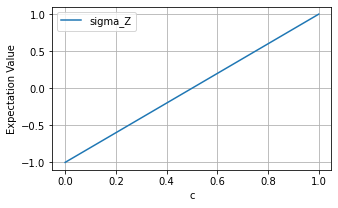

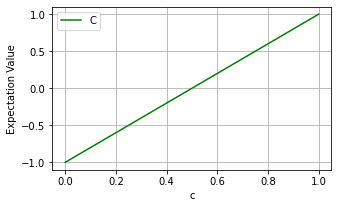

In [10]:
import matplotlib.pyplot as plt

c_values = np.linspace(0,1,20)


plt.figure(figsize=(5,3))
plt.plot(c_values, [np.abs(a)**2 - np.abs(1-a)**2 for a in alpha_values], label = 'sigma_Z')
plt.grid()
#plt.axhline(y=0.5, color='r', linestyle='-', label = '0.5')
plt.xlabel('c')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(5,3))
plt.plot(c_values, [2*c - 1 for c in c_values], label = 'C', color="g")
plt.grid()
plt.xlabel('c')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

### Defining Sigma_X Function

In [11]:
def sigmax_meas(prob_state,prob_mode1,prob_mode2,initial_state,nm_total,ckh_mode1,ckh_mode2,prep_mode1, prep_mode2,select):

    #Prep modes are the ones who are used to achieve a certain state (e.g. H) from the initial state (e.g. x+)
    state1 = PS(N, phi:=3*np.pi/2,qt.tensor(initial_state,prob_state),nm_total,prep_mode1)[0]
    state2 = BS(0.07853957008534297,N, state1 ,number_modes:=nm_total,prep_mode1,prep_mode2)[0]

    state3 = BS(0.07853957008534297,N, state:=state2 ,number_modes,prob_mode1,prob_mode2)[0]
    state4 = CKH2(N, kappa:=1*0.3139464882943144, state:=state3, number_modes,ckh_mode1,ckh_mode2,prob_mode1,prob_mode2)[0]

    state5 = PS(N, phi:=np.pi,state4, number_modes,prob_mode1)[0]

    if select == 0:
        return BS(0.07853957008534297,N, state5 ,number_modes,prob_mode1,prob_mode2)[0]
        
    else:
        return BS(0.07853957008534297,N, state5 ,number_modes,prob_mode1,prob_mode2)[1:number_modes+1]
    
    

In [12]:
alpha_values = []
beta_values = []
for theta in np.linspace(0, 2*np.pi, 20):
    c = 1/2
    A = np.sqrt(1-c)
    B = np.sqrt(c)*np.exp(1j*theta)
    
    psi_pol1 = A*(qt.tensor(qt.basis(N:=2,1),qt.basis(N,0),qt.basis(N,0),qt.basis(N,0)))  
    
    psi_pol2 = B*(qt.tensor(qt.basis(N:=2,0),qt.basis(N,1),qt.basis(N,0),qt.basis(N,0)))
    
    psi_pol = psi_pol1 + psi_pol2
    
    prob_state = qt.tensor(qt.basis(N,1),qt.basis(N,0))
    
    results = sigmax_meas(prob_state:=prob_state,prob_mode1:=4,probe_mode2:=5,initial_state:=psi_pol,nm_total:=6,ckh_mode1:=4,ckh_mode2:=1,prep_mode1:=0,prep_mode2:=1,1)

    alpha = results[4]
    beta = results[5]
    
    alpha_values.append(alpha)
    beta_values.append(beta)

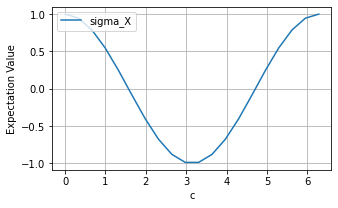

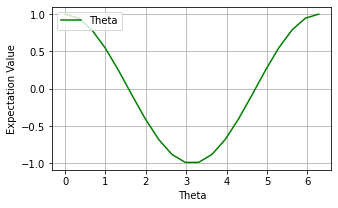

In [13]:
import matplotlib.pyplot as plt

theta_values = np.linspace(0,2*np.pi,20)


plt.figure(figsize=(5,3))
plt.plot(theta_values, [np.real(a) - np.real(1-a) for a in alpha_values], label = 'sigma_X')
plt.grid()
#plt.axhline(y=0.5, color='r', linestyle='-', label = '0.5')
plt.xlabel('c')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(5,3))
plt.plot(theta_values, [np.cos(theta) for theta in theta_values], label = 'Theta', color="g")
plt.grid()
plt.xlabel('Theta')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

## Sigma Y 

In [17]:
def sigmay_meas(prob_state,prob_mode1,prob_mode2,initial_state,nm_total,ckh_mode1,ckh_mode2,prep_mode1, prep_mode2,select):

    #Prep modes are the ones who are used to achieve a certain state (e.g. H) from the initial state (e.g. x+)
    state1 = PS(N, phi:=0*np.pi/2,qt.tensor(initial_state,prob_state),nm_total,prep_mode1)[0]
    state2 = BS(0.07853957008534297,N, state1 ,number_modes:=nm_total,prep_mode1,prep_mode2)[0]

    state3 = BS(0.07853957008534297,N, state:=state2 ,number_modes,prob_mode1,prob_mode2)[0]
    state4 = CKH2(N, kappa:=1*0.3139464882943144, state:=state3, number_modes,ckh_mode1,ckh_mode2,prob_mode1,prob_mode2)[0]

    state5 = PS(N, phi:=np.pi,state4, number_modes,prob_mode1)[0]

    if select == 0:
        return BS(0.07853957008534297,N, state5 ,number_modes,prob_mode1,prob_mode2)[0]
        
    else:
        return BS(0.07853957008534297,N, state5 ,number_modes,prob_mode1,prob_mode2)[1:number_modes+1]    
    
    

In [15]:
alpha_values = []
beta_values = []
for theta in np.linspace(0, 2*np.pi, 20):
    c = 1/2
    A = np.sqrt(1-c)
    B = 1j*np.sqrt(c)*np.exp(1j*theta)
    
    psi_pol1 = A*(qt.tensor(qt.basis(N:=2,1),qt.basis(N,0),qt.basis(N,0),qt.basis(N,0)))  
    
    psi_pol2 = B*(qt.tensor(qt.basis(N:=2,0),qt.basis(N,1),qt.basis(N,0),qt.basis(N,0)))
    
    psi_pol = psi_pol1 + psi_pol2
    
    prob_state = qt.tensor(qt.basis(N,1),qt.basis(N,0))
    
    results = sigmay_meas(prob_state:=prob_state,prob_mode1:=4,probe_mode2:=5,initial_state:=psi_pol,nm_total:=6,ckh_mode1:=4,ckh_mode2:=1,prep_mode1:=0,prep_mode2:=1,1)

    alpha = results[4]
    beta = results[5]
    
    alpha_values.append(alpha)
    beta_values.append(beta)

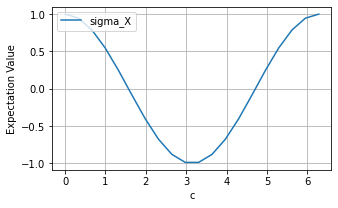

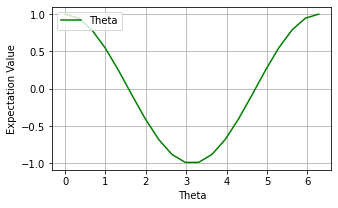

In [16]:
import matplotlib.pyplot as plt

theta_values = np.linspace(0,2*np.pi,20)


plt.figure(figsize=(5,3))
plt.plot(theta_values, [np.real(a) - np.real(1-a) for a in alpha_values], label = 'sigma_X')
plt.grid()
#plt.axhline(y=0.5, color='r', linestyle='-', label = '0.5')
plt.xlabel('c')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(5,3))
plt.plot(theta_values, [np.cos(theta) for theta in theta_values], label = 'Theta', color="g")
plt.grid()
plt.xlabel('Theta')
plt.ylabel('Expectation Value')
plt.legend(loc="upper left")
plt.show()

# All of them work!!